In [272]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [273]:
def load_dataset(path):
	
	data = pd.read_csv(path, header=3)
	timestamp = data.iloc[:, 0].to_numpy()
	output_voltage = data.iloc[:, 1].to_numpy()
	output_current = data.iloc[:, 2].to_numpy()
	thermistor_temperatures = data.iloc[:, 3:].to_numpy()

	comments = re.search(r"Comments: (.*)$", open(path).read(), re.MULTILINE)[1]

	return timestamp, output_voltage, output_current, thermistor_temperatures, comments

timestamp, output_voltage, output_current, thermistor_temperatures, comments = (
	load_dataset("../data/brass data/brass 5s.csv")
)

In [274]:
thermistor_num = [
    'thermistor_0/C',
    'thermistor_1/C',
    'thermistor_2/C',
    'thermistor_3/C',
    'thermistor_4/C',
    'thermistor_5/C',
    'thermistor_6/C',
    'thermistor_7/C'
]


In [275]:
thermistor_temperatures

array([[32.41226, 32.42816, 32.48389, ..., 32.509  , 32.56055, 32.47589],
       [32.42422, 32.42896, 32.48077, ..., 32.50925, 32.56039, 32.47598],
       [32.44424, 32.43164, 32.47729, ..., 32.50848, 32.56052, 32.47632],
       ...,
       [32.54218, 32.6095 , 32.59967, ..., 32.53418, 32.58661, 32.5032 ],
       [32.52798, 32.60132, 32.59772, ..., 32.53479, 32.586  , 32.50479],
       [32.50653, 32.58923, 32.59531, ..., 32.53494, 32.5864 , 32.50378]])

In [276]:
thermistor_num

['thermistor_0/C',
 'thermistor_1/C',
 'thermistor_2/C',
 'thermistor_3/C',
 'thermistor_4/C',
 'thermistor_5/C',
 'thermistor_6/C',
 'thermistor_7/C']

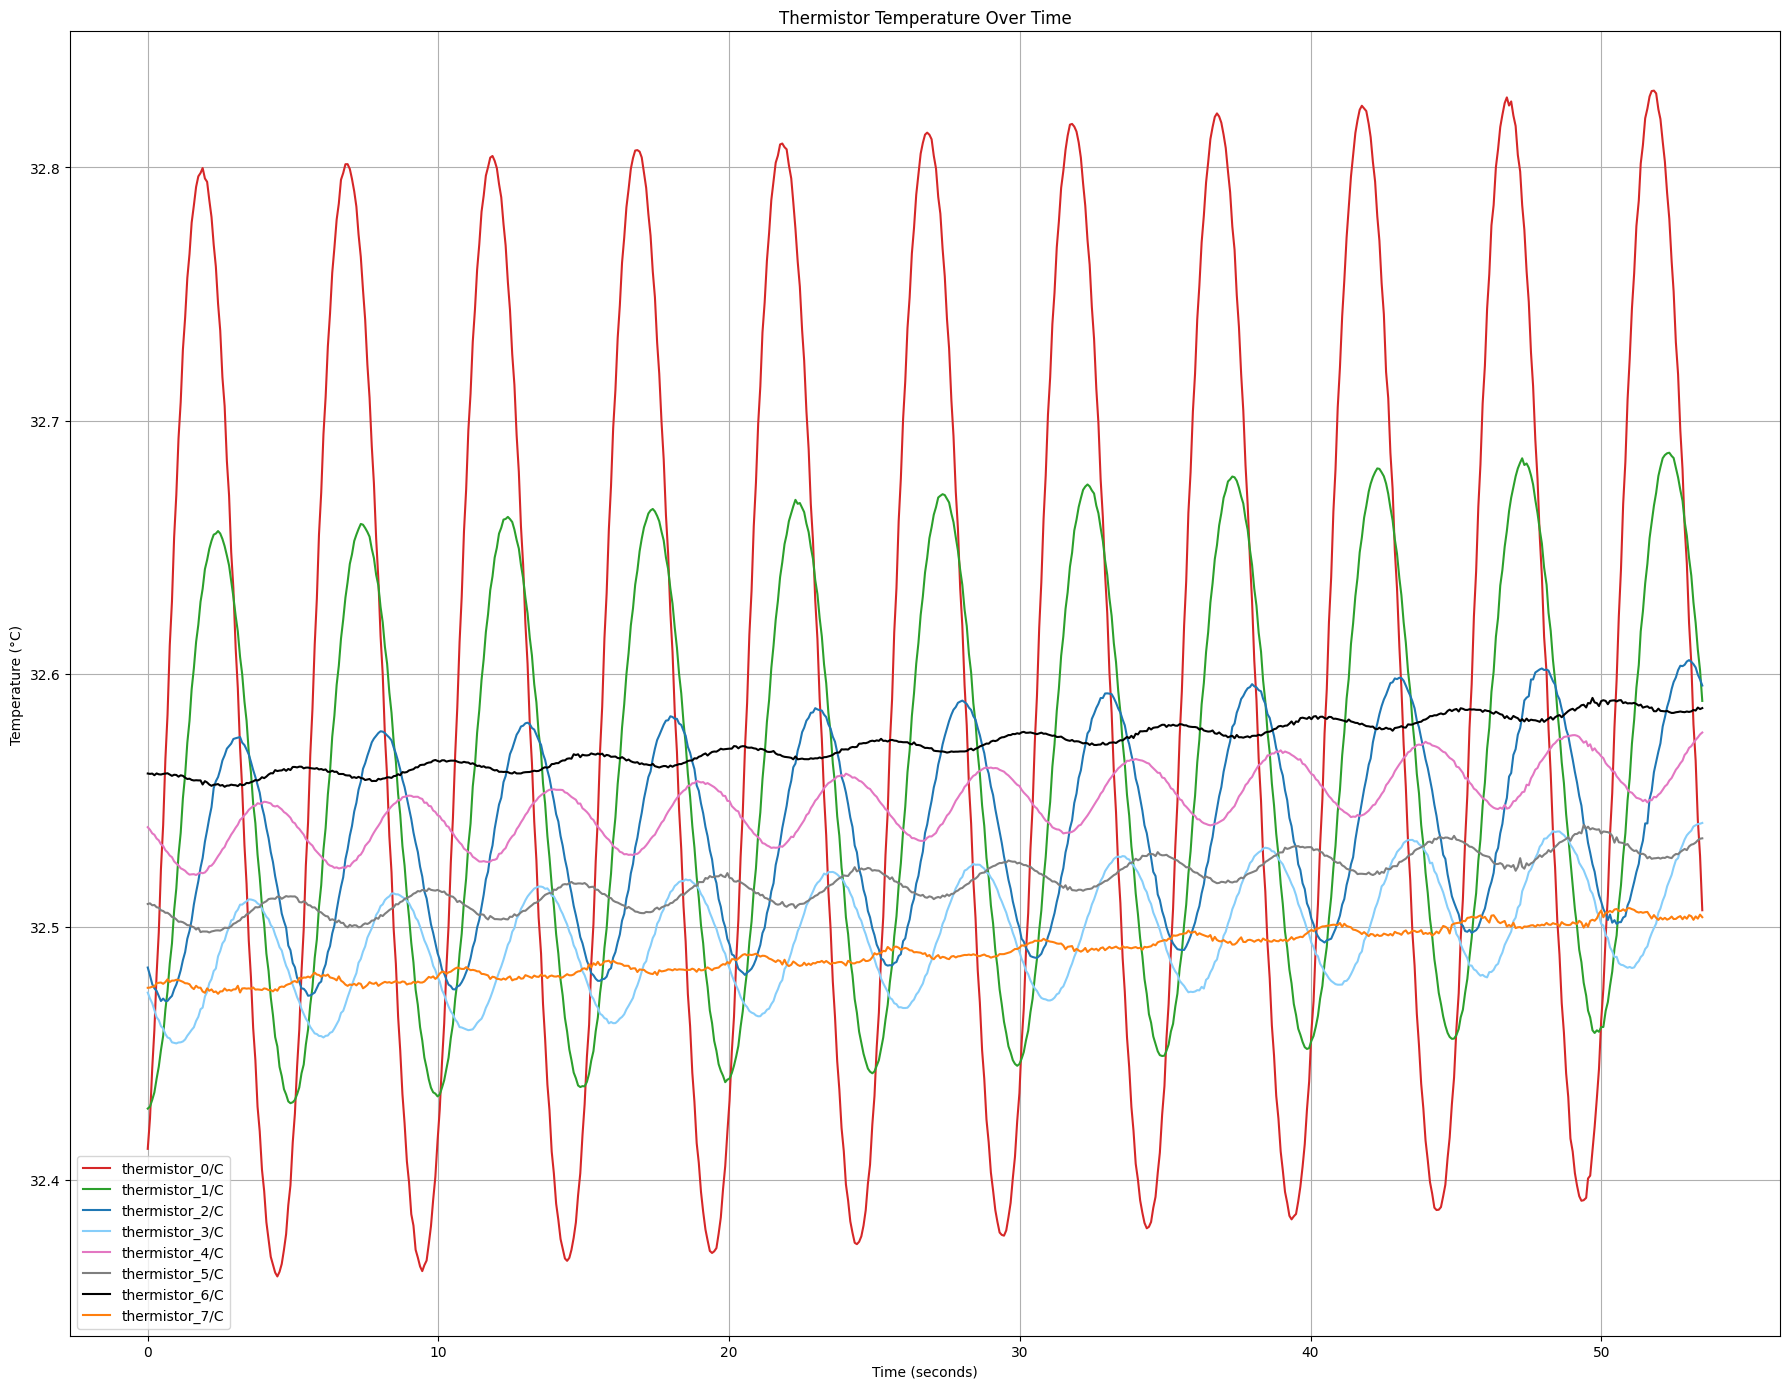

In [277]:
colors = ['tab:red', 'tab:green', 'tab:blue', 'lightskyblue', 
          'tab:pink', 'tab:gray', 'black', 'tab:orange']

plt.figure(figsize=(18, 14))

# Plot each thermistor's data with a different color and label
for i in range(8):
    plt.plot(timestamp, thermistor_temperatures[:,i], label=thermistor_num[i], color=colors[i])

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.title('Thermistor Temperature Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Column 0 fit results:
  A     = 0.2190 ± 0.0003
  omega = 1.258864 ± 0.000074 rad/s
  phi   = -0.8221 ± 0.0023 rad
  B     = 0.000646 ± 0.000012 (slope)
  C     = 32.5775 ± 0.0004 (offset)
  Period = 4.9912 ± 0.0003 s


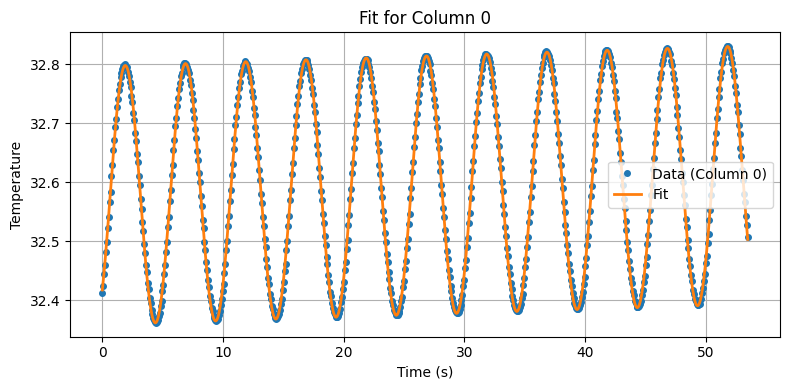


Column 1 fit results:
  A     = 0.1136 ± 0.0001
  omega = 1.258853 ± 0.000060 rad/s
  phi   = -1.4709 ± 0.0019 rad
  B     = 0.000631 ± 0.000005 (slope)
  C     = 32.5413 ± 0.0001 (offset)
  Period = 4.9912 ± 0.0002 s


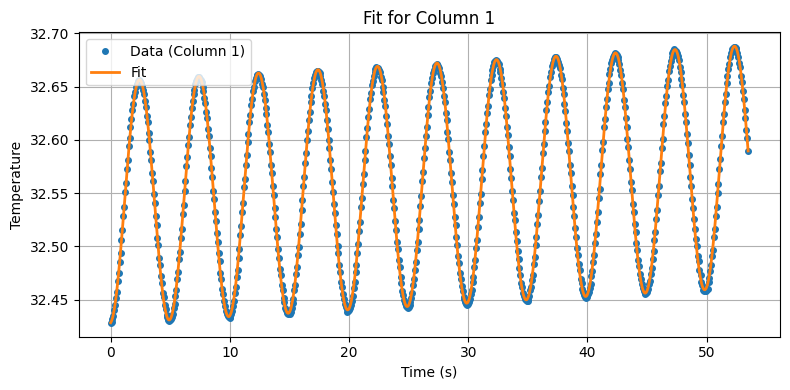


Column 2 fit results:
  A     = 0.0515 ± 0.0000
  omega = 1.258843 ± 0.000064 rad/s
  phi   = -2.2866 ± 0.0020 rad
  B     = 0.000613 ± 0.000002 (slope)
  C     = 32.5213 ± 0.0001 (offset)
  Period = 4.9912 ± 0.0003 s


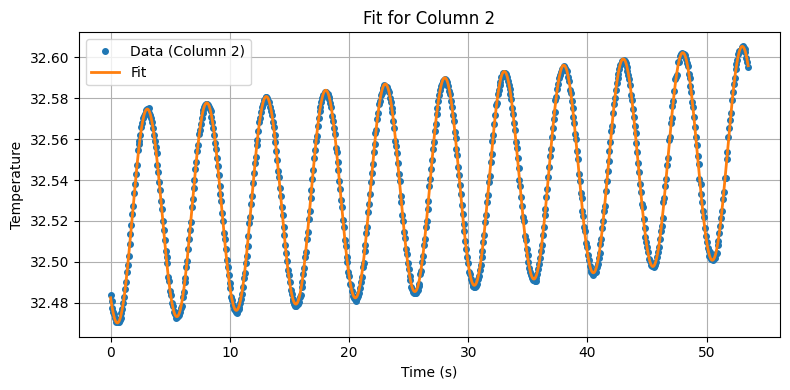


Column 3 fit results:
  A     = 0.0277 ± 0.0000
  omega = 1.258821 ± 0.000077 rad/s
  phi   = -2.8701 ± 0.0024 rad
  B     = 0.000606 ± 0.000002 (slope)
  C     = 32.4806 ± 0.0000 (offset)
  Period = 4.9913 ± 0.0003 s


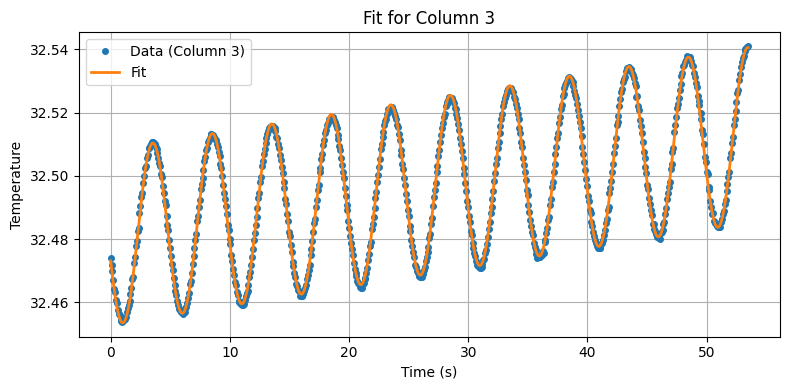


Column 4 fit results:
  A     = 0.0136 ± 0.0000
  omega = 1.259246 ± 0.000181 rad/s
  phi   = 2.7030 ± 0.0056 rad
  B     = 0.000592 ± 0.000002 (slope)
  C     = 32.5329 ± 0.0001 (offset)
  Period = 4.9896 ± 0.0007 s


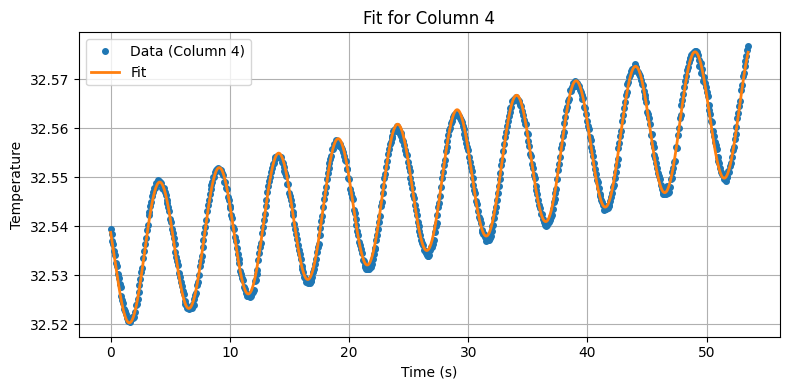


Column 5 fit results:
  A     = 0.0064 ± 0.0000
  omega = 1.259654 ± 0.000300 rad/s
  phi   = 1.9641 ± 0.0093 rad
  B     = 0.000584 ± 0.000001 (slope)
  C     = 32.5023 ± 0.0000 (offset)
  Period = 4.9880 ± 0.0012 s


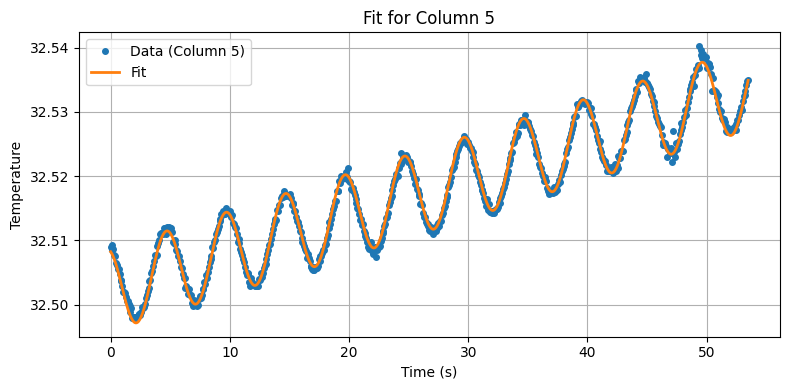


Column 6 fit results:
  A     = 0.0031 ± 0.0000
  omega = 1.258685 ± 0.000598 rad/s
  phi   = 1.1760 ± 0.0184 rad
  B     = 0.000580 ± 0.000001 (slope)
  C     = 32.5565 ± 0.0000 (offset)
  Period = 4.9919 ± 0.0024 s


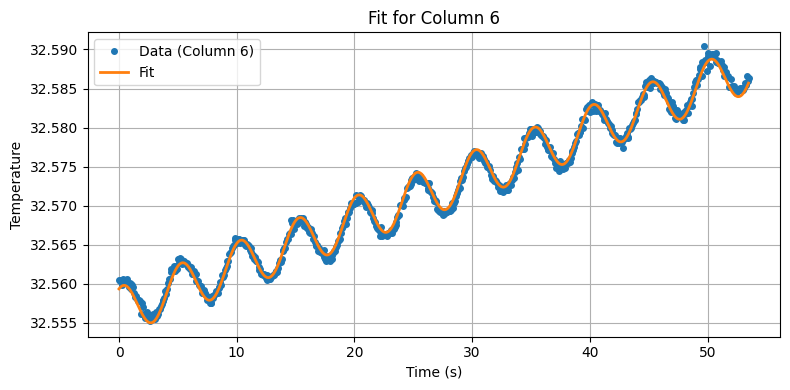


Column 7 fit results:
  A     = 0.0022 ± 0.0001
  omega = 1.256460 ± 0.001641 rad/s
  phi   = 0.5900 ± 0.0506 rad
  B     = 0.000574 ± 0.000003 (slope)
  C     = 32.4741 ± 0.0001 (offset)
  Period = 5.0007 ± 0.0065 s


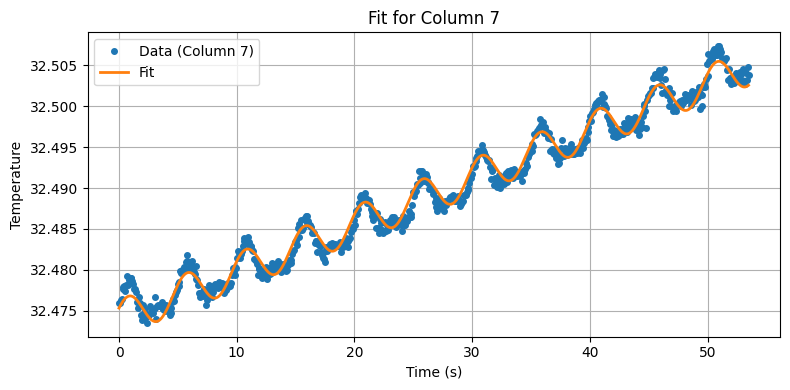

In [278]:
omega_guesses = [2 * np.pi / 5] * 8


# ---- Step 1: Define the model ----
def sin_plus_line(t, A, omega, phi, B, C):
    return A * np.sin(omega * t + phi) + B * t + C

# ---- Step 2: Generalized initial guess function with custom omega ----
def initial_guess(t, y, omega_guess):
    A_guess = (np.max(y) - np.min(y)) / 2
    phi_guess = 0
    B_guess = 0  # Assuming no trend as initial guess
    C_guess = np.mean(y)
    return [A_guess, omega_guess, phi_guess, B_guess, C_guess]

# ---- Step 3: Fitting loop for all columns ----
# Inputs
# timestamp: 1D array
# thermistor_temperatures: 2D array (rows: time points, columns: sensors)
# omega_guesses: 1D array of omega values, one per column

n_columns = thermistor_temperatures.shape[1]
assert len(omega_guesses) == n_columns, "Length of omega_guesses must match number of columns"

fit_results = []  # Will hold dictionaries of fit parameters and errors

for i in range(n_columns):
    y = thermistor_temperatures[:, i]
    omega_0 = omega_guesses[i]
    
    try:
        # Fit the model
        popt, pcov = curve_fit(
            sin_plus_line,
            timestamp,
            y,
            p0=initial_guess(timestamp, y, omega_0)
        )

        # Extract values and uncertainties
        A, omega, phi, B, C = popt
        A, omega, phi, B, C = popt


        if A < 0:
          A = -A
          phi = phi + np.pi
          phi = (phi + np.pi) % (2*np.pi) - np.pi  

        perr = np.sqrt(np.diag(pcov))
        A_err, omega_err, phi_err, B_err, C_err = perr

        # Compute derived quantity: period
        period = 2 * np.pi / omega if omega != 0 else np.nan
        period_err = (2 * np.pi / omega**2) * omega_err if omega != 0 else np.nan

        # Store results
        fit_results.append({
            'column': i,
            'A': (A, A_err),
            'omega': (omega, omega_err),
            'phi': (phi, phi_err),
            'B': (B, B_err),
            'C': (C, C_err),
            'period': (period, period_err)
        })

        # Print the results above the plot
        print(f"\nColumn {i} fit results:")
        print(f"  A     = {A:.4f} ± {A_err:.4f}")
        print(f"  omega = {omega:.6f} ± {omega_err:.6f} rad/s")
        print(f"  phi   = {phi:.4f} ± {phi_err:.4f} rad")
        print(f"  B     = {B:.6f} ± {B_err:.6f} (slope)")
        print(f"  C     = {C:.4f} ± {C_err:.4f} (offset)")
        print(f"  Period = {period:.4f} ± {period_err:.4f} s")
        
        # Plot the fit (optional)
        t_fit = np.linspace(min(timestamp), max(timestamp), 1000)
        y_fit = sin_plus_line(t_fit, *popt)

        plt.figure(figsize=(8, 4))
        plt.plot(timestamp, y, 'o', label=f'Data (Column {i})', markersize=4)
        plt.plot(t_fit, y_fit, '-', label='Fit', linewidth=2)
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature')
        plt.title(f'Fit for Column {i}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except RuntimeError as e:
        print(f"Fit failed for column {i}: {e}")
        fit_results.append({
            'column': i,
            'error': str(e)
        })

In [279]:
def error_percentages (i):
        y = thermistor_temperatures[:, i]
        omega_0 = omega_guesses[i]

        popt, pcov = curve_fit(
            sin_plus_line,
            timestamp,
            y,
            p0=initial_guess(timestamp, y, omega_0)
        )

        A, omega, phi, B, C = popt
        perr = np.sqrt(np.diag(pcov))
        A_err, omega_err, phi_err, B_err, C_err = perr
        return (perr/popt)

In [280]:
def sin_fit_val(i):
    
    y = thermistor_temperatures[:, i]
    omega_0 = omega_guesses[i]

    popt, pcov = curve_fit(
        sin_plus_line,
        timestamp,
        y,
        p0=initial_guess(timestamp, y, omega_0)
    )

    A, omega, phi, B, C = popt

    if A < 0:
        A = -A
        phi = phi + np.pi

        phi = (phi + np.pi) % (2 * np.pi) - np.pi

    return np.array([A, omega, phi, B, C])

In [281]:
for res in fit_results:
    if 'error' in res:
        print(f"\nColumn {res['column']}: Fit failed ({res['error']})")
    else:
        print(f"\nColumn {res['column']} fit results:")
        print(f"  A     = {res['A'][0]:.4f} ± {res['A'][1]:.4f}")
        print(f"  omega = {res['omega'][0]:.6f} ± {res['omega'][1]:.6f} rad/s")
        print(f"  phi   = {res['phi'][0]:.4f} ± {res['phi'][1]:.4f} rad")
        print(f"  B     = {res['B'][0]:.6f} ± {res['B'][1]:.6f} (slope)")
        print(f"  C     = {res['C'][0]:.4f} ± {res['C'][1]:.4f} (offset)")
        print(f"  Period = {res['period'][0]:.4f} ± {res['period'][1]:.4f} s")


Column 0 fit results:
  A     = 0.2190 ± 0.0003
  omega = 1.258864 ± 0.000074 rad/s
  phi   = -0.8221 ± 0.0023 rad
  B     = 0.000646 ± 0.000012 (slope)
  C     = 32.5775 ± 0.0004 (offset)
  Period = 4.9912 ± 0.0003 s

Column 1 fit results:
  A     = 0.1136 ± 0.0001
  omega = 1.258853 ± 0.000060 rad/s
  phi   = -1.4709 ± 0.0019 rad
  B     = 0.000631 ± 0.000005 (slope)
  C     = 32.5413 ± 0.0001 (offset)
  Period = 4.9912 ± 0.0002 s

Column 2 fit results:
  A     = 0.0515 ± 0.0000
  omega = 1.258843 ± 0.000064 rad/s
  phi   = -2.2866 ± 0.0020 rad
  B     = 0.000613 ± 0.000002 (slope)
  C     = 32.5213 ± 0.0001 (offset)
  Period = 4.9912 ± 0.0003 s

Column 3 fit results:
  A     = 0.0277 ± 0.0000
  omega = 1.258821 ± 0.000077 rad/s
  phi   = -2.8701 ± 0.0024 rad
  B     = 0.000606 ± 0.000002 (slope)
  C     = 32.4806 ± 0.0000 (offset)
  Period = 4.9913 ± 0.0003 s

Column 4 fit results:
  A     = 0.0136 ± 0.0000
  omega = 1.259246 ± 0.000181 rad/s
  phi   = 2.7030 ± 0.0056 rad
  B     =

In [282]:
for i in range (8):
    print(sin_fit_val(i))


[ 2.18953605e-01  1.25886358e+00 -8.22066738e-01  6.45521815e-04
  3.25774973e+01]
[ 1.13591256e-01  1.25885303e+00 -1.47094112e+00  6.31349348e-04
  3.25413406e+01]
[ 5.14700559e-02  1.25884343e+00 -2.28664848e+00  6.12982273e-04
  3.25213281e+01]
[ 2.76875253e-02  1.25882104e+00 -2.87011350e+00  6.05536807e-04
  3.24805508e+01]
[1.36347367e-02 1.25924638e+00 2.70304317e+00 5.92273735e-04
 3.25329348e+01]
[6.40612458e-03 1.25965422e+00 1.96409379e+00 5.84245847e-04
 3.25023290e+01]
[3.09135719e-03 1.25868451e+00 1.17603987e+00 5.79822248e-04
 3.25565100e+01]
[2.24150163e-03 1.25645955e+00 5.89987077e-01 5.73673467e-04
 3.24740724e+01]


In [283]:
sin_fit_val (3)

array([ 2.76875253e-02,  1.25882104e+00, -2.87011350e+00,  6.05536807e-04,
        3.24805508e+01])

In [284]:
error_percentages(7)

array([2.47508737e-02, 1.30632959e-03, 8.57011631e-02, 4.46558495e-03,
       2.43200386e-06])

In [285]:
def calculate_D(a, b):

    A_a, omega_a, phi_a, _, _ = sin_fit_val(a)
    A_b, omega_b, phi_b, _, _ = sin_fit_val(b)

    omega = np.mean([omega_a, omega_b])          
    delta_d = 0.005 * np.abs(a - b)              

    A_ratio = A_b / A_a                        
    delta_phi = phi_b - phi_a                  

    D_amplitude = omega * (delta_d ** 2) / (2 * (np.log(A_ratio)) ** 2)
    D_phase = omega * (delta_d ** 2) / (2 * (delta_phi) ** 2)

    return D_amplitude, D_phase

In [286]:
calculate_D(0, 3)

(3.311876030715699e-05, 3.376324018943115e-05)

In [287]:
def error_from_two (a, b, quantity):
    a_errors_percentages = error_percentages(a)
    b_errors_percentages = error_percentages(b)
    result = np.sqrt((a_errors_percentages[quantity])**2 + (b_errors_percentages[quantity])**2)
    return result

In [288]:
error_from_two (0, 3, 0)

0.001667790081915267

In [289]:
def DA_DPhi(a, b):
    error_in_A_ratio = error_from_two(a, b, 0)
    error_in_delta_phi = error_from_two(a, b, 2)
    
    A_ratio = np.abs((sin_fit_val(a)[0]) / (sin_fit_val(b)[0]))
    print(A_ratio)
    delta_phi = np.abs(sin_fit_val(a)[2] - sin_fit_val(b)[2])
    print(delta_phi)
    
    delta_d = 0.003 * np.abs(a - b)
    omega = 2 * np.pi / 5
    
    
    DA_error = (omega * (delta_d)**2 / (2 * (np.log(error_in_A_ratio))**2))
    
    Dphi_error = (omega * (delta_d)**2 / (2 * (error_in_delta_phi)**2))
    
    return [DA, DA_error, Dphi, Dphi_error]


In [290]:
def DA_DPhi(a, b):
    
    A_a, omega_a, phi_a, _, _ = sin_fit_val(a)
    A_b, omega_b, phi_b, _, _ = sin_fit_val(b)

    omega = np.mean([omega_a, omega_b])
    delta_d = 0.005 * np.abs(a - b)

    A_ratio = np.abs(A_b) / np.abs(A_a)
    delta_phi = np.abs(phi_b - phi_a)

    DA = omega * (delta_d)**2 / (2 * (np.log(A_ratio))**2)
    Dphi = omega * (delta_d)**2 / (2 * (delta_phi)**2)

    error_in_A_ratio = error_from_two(a, b, 0)      
    error_in_delta_phi = error_from_two(a, b, 2)    

    r_A = error_in_A_ratio / 100
    r_phi = error_in_delta_phi / 100

    DA_rel_error = 2 * r_A / np.abs(np.log(A_ratio))
    Dphi_rel_error = 2 * r_phi / np.abs(delta_phi)

    DA_error = DA * DA_rel_error
    Dphi_error = Dphi * Dphi_rel_error

    DA_error_percent = DA_rel_error * 100
    Dphi_error_percent = Dphi_rel_error * 100

    return {
        "DA": DA,
        "DA_error": DA_error,
        "DA_error_%": DA_error_percent,
        "Dphi": Dphi,
        "Dphi_error": Dphi_error,
        "Dphi_error_%": Dphi_error_percent
    }


In [291]:
DA_DPhi(0, 3)

{'DA': 3.311876030715699e-05,
 'DA_error': 5.342205171665259e-10,
 'DA_error_%': 0.0016130450301036188,
 'Dphi': 3.376324018943115e-05,
 'Dphi_error': 3.0394944172259415e-09,
 'Dphi_error_%': 0.009002377734401774}